In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Input
https://www.kaggle.com/budincsevity/szeged-weather

In [9]:
szeged = pd.read_csv("weatherHistory.csv")

In [10]:
szeged.head(2)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.


## Data format to pandas.datatime

In [11]:
szeged['Date'] = pd.to_datetime(szeged['Formatted Date'],utc=True)

## Split the data in two subdatas

In [12]:
cuali = szeged.select_dtypes(include = ["object"]).keys()

In [13]:
cuanti = szeged.select_dtypes(include = ["int64","float64"]).keys()

In [14]:
szeged=szeged.drop('Formatted Date',axis=1)

In [15]:
szeged[cuanti].describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


# Histogram for quantitative data

Text(0, 0.5, 'Probability')

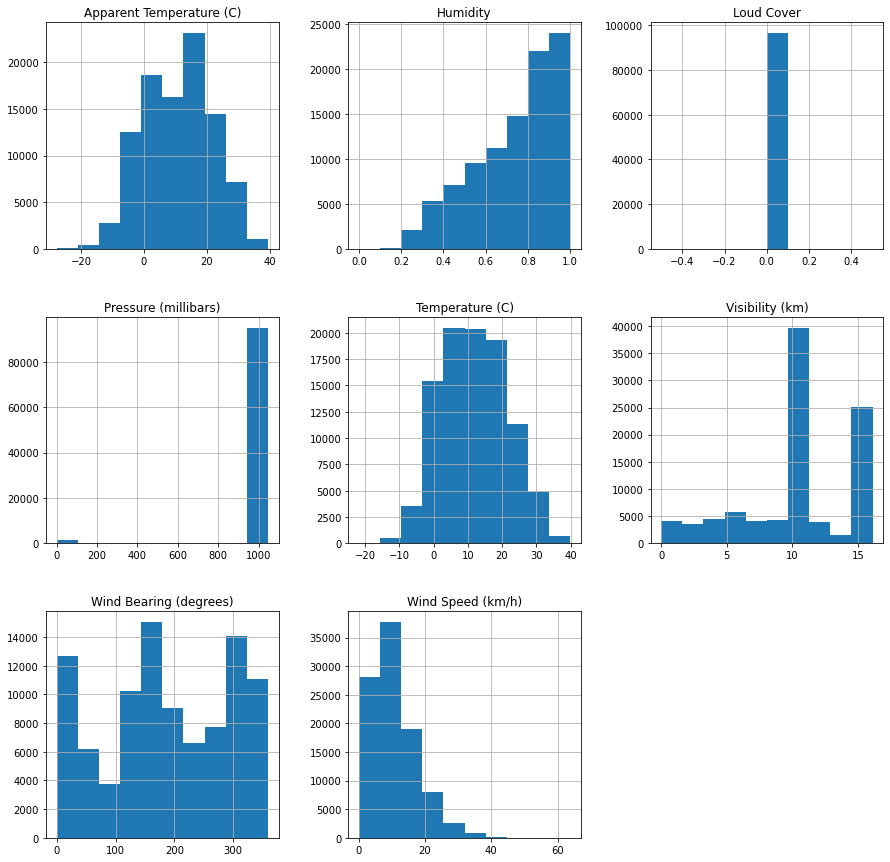

In [16]:
szeged[cuanti].hist(figsize=(15,15))
plt.ylabel('Probability')

## Delete the useless columns

In [17]:
szeged=szeged.drop('Loud Cover',axis=1)
szeged=szeged.drop('Wind Bearing (degrees)',axis=1)

## Search the most frequent summaries

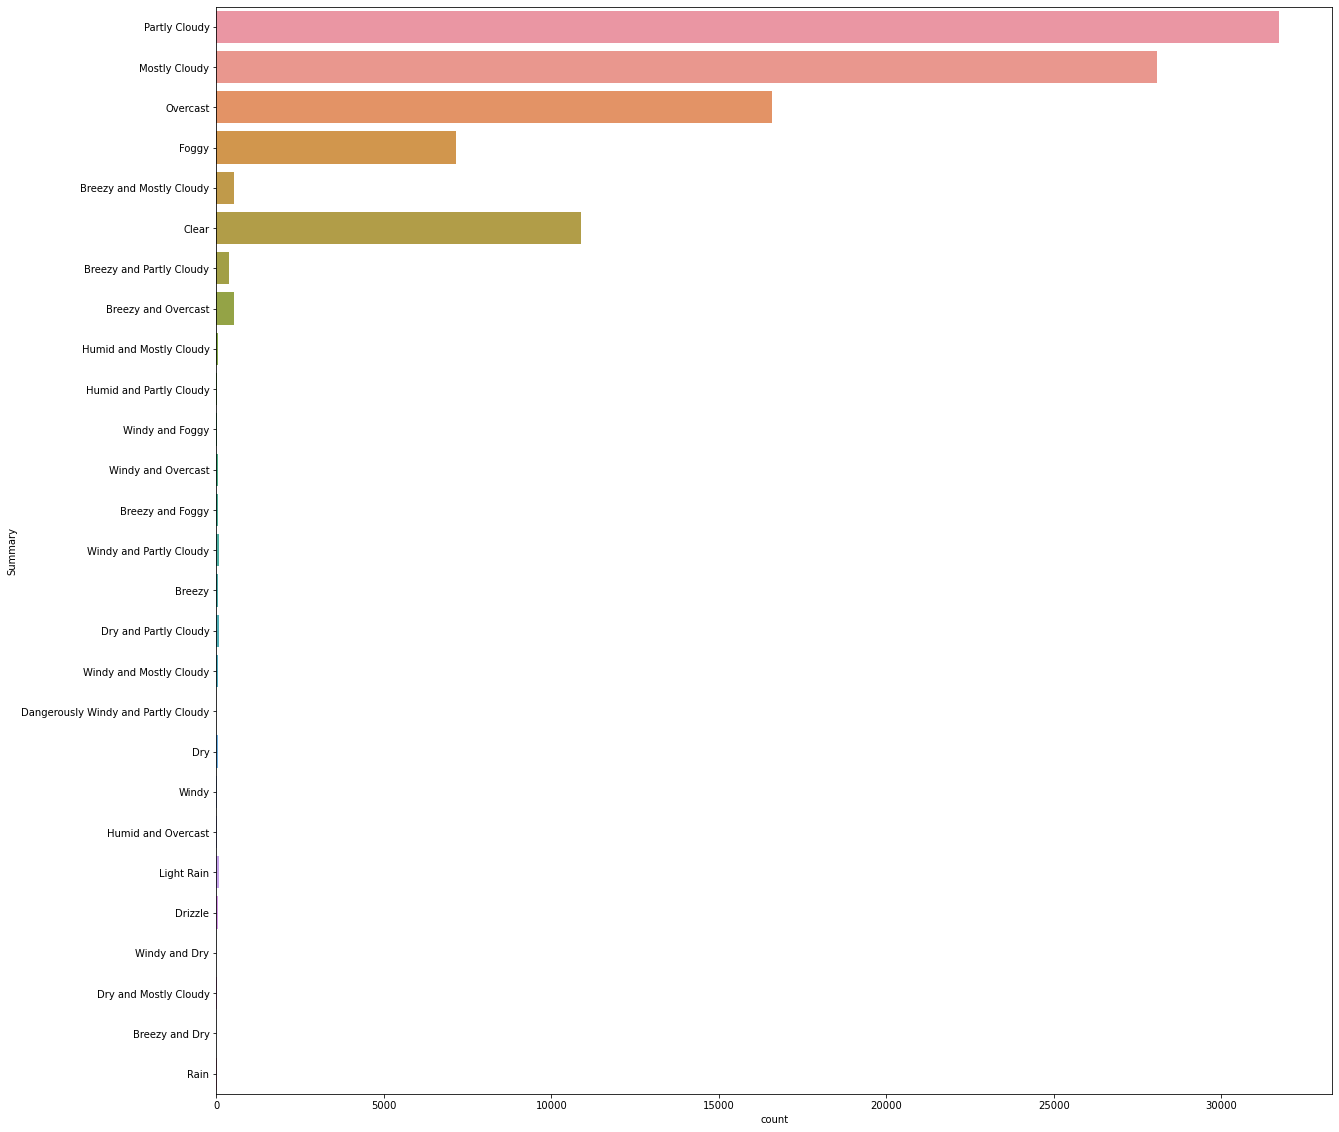

In [18]:
plt.figure(figsize=(20,20))
sns.countplot(y=szeged['Summary'])

In [19]:
summary_freq=pd.crosstab(index=szeged['Summary'],columns="count")
summary_freq.sort_values('count', ascending=False)

col_0,count
Summary,
Partly Cloudy,31733
Mostly Cloudy,28094
Overcast,16597
Clear,10890
Foggy,7148
Breezy and Overcast,528
Breezy and Mostly Cloudy,516
Breezy and Partly Cloudy,386
Dry and Partly Cloudy,86


## Delete the uncommon sumaries 

In [20]:
summary_filter=szeged.groupby("Summary").filter(lambda x : (x['Summary'].count()>=1000).any())

In [21]:
summary_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94462 entries, 0 to 96452
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   Summary                   94462 non-null  object             
 1   Precip Type               93945 non-null  object             
 2   Temperature (C)           94462 non-null  float64            
 3   Apparent Temperature (C)  94462 non-null  float64            
 4   Humidity                  94462 non-null  float64            
 5   Wind Speed (km/h)         94462 non-null  float64            
 6   Visibility (km)           94462 non-null  float64            
 7   Pressure (millibars)      94462 non-null  float64            
 8   Daily Summary             94462 non-null  object             
 9   Date                      94462 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), float64(6), object(3)
memory usage: 7.9+ MB


In [22]:
szeged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   Summary                   96453 non-null  object             
 1   Precip Type               95936 non-null  object             
 2   Temperature (C)           96453 non-null  float64            
 3   Apparent Temperature (C)  96453 non-null  float64            
 4   Humidity                  96453 non-null  float64            
 5   Wind Speed (km/h)         96453 non-null  float64            
 6   Visibility (km)           96453 non-null  float64            
 7   Pressure (millibars)      96453 non-null  float64            
 8   Daily Summary             96453 non-null  object             
 9   Date                      96453 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), float64(6), object(3)
memory usage: 7.4+ MB


# Data analysis 

## Model (Gaussian Naive Bayes) for summary prediction

In [23]:
weather_regresion = summary_filter.drop(["Date", "Precip Type", "Daily Summary", 'Apparent Temperature (C)'], axis=1)

In [24]:
weather_regresion

,Summary,Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Pressure (millibars)
0,Partly Cloudy,9.472222,0.89,14.1197,15.8263,1015.13
1,Partly Cloudy,9.355556,0.86,14.2646,15.8263,1015.63
2,Mostly Cloudy,9.377778,0.89,3.9284,14.9569,1015.94
3,Partly Cloudy,8.288889,0.83,14.1036,15.8263,1016.41
4,Mostly Cloudy,8.755556,0.83,11.0446,15.8263,1016.51
...,...,...,...,...,...,...
96448,Partly Cloudy,26.016667,0.43,10.9963,16.1000,1014.36
96449,Partly Cloudy,24.583333,0.48,10.0947,15.5526,1015.16
96450,Partly Cloudy,22.038889,0.56,8.9838,16.1000,1015.66
96451,Partly Cloudy,21.522222,0.60,10.5294,16.1000,1015.95


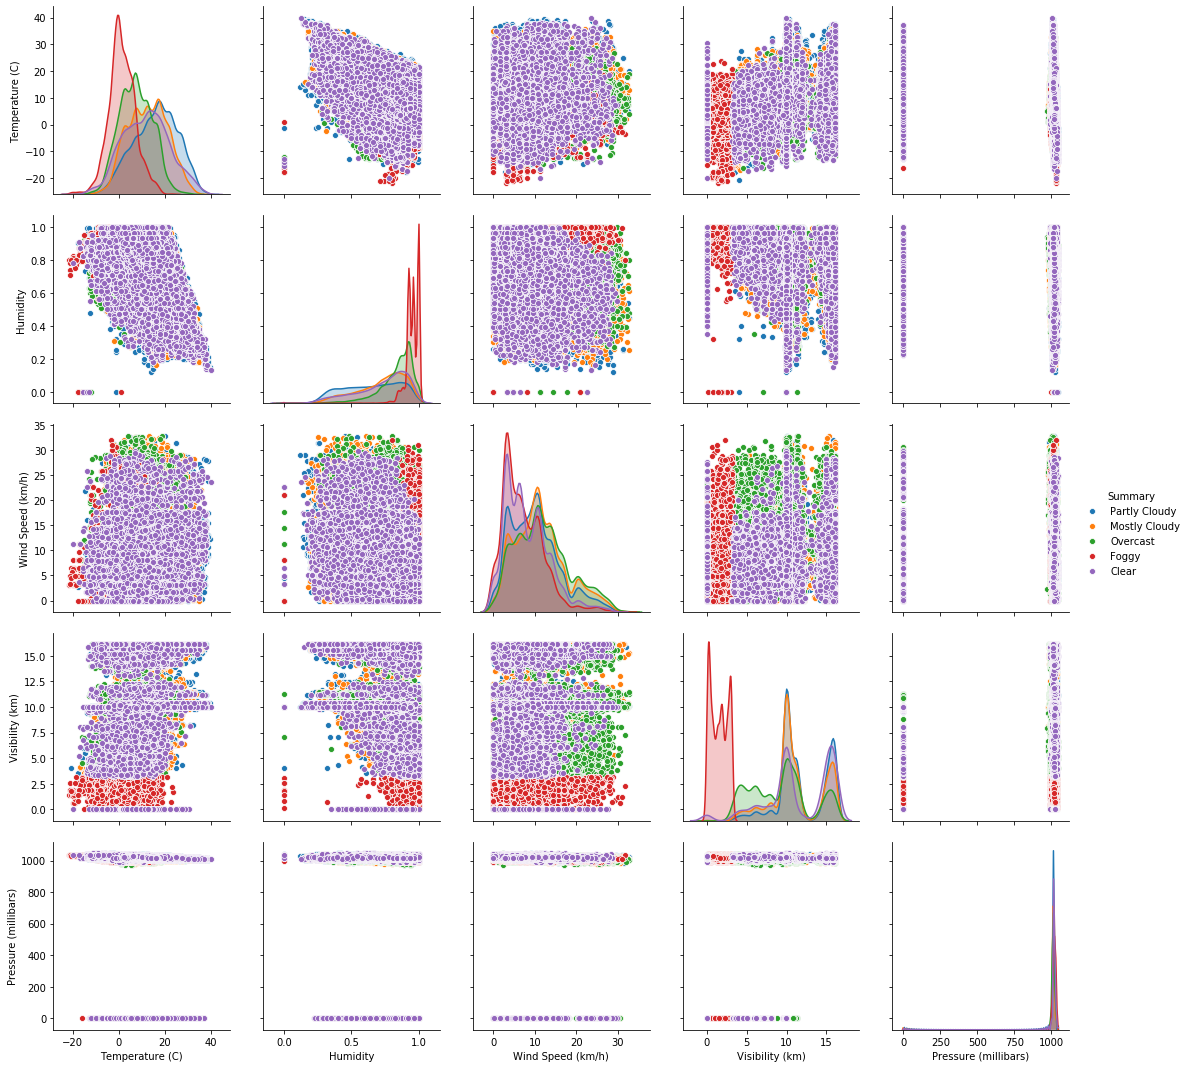

In [26]:
sns.pairplot(weather_regresion, hue='Summary', height=3)

In [25]:
X = weather_summary.drop('Summary', axis=1)
Y = weather_summary['Summary']

In [26]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y,
                                                random_state=1)
(Xtrain.shape,Xtest.shape)

((70846, 5), (23616, 5))

In [27]:
from sklearn.naive_bayes import GaussianNB # 1. selección del modelo
model = GaussianNB()                       # 2. instanciación
model.fit(Xtrain, ytrain)                  # 3. ajuste del modelo a los datos
y_model = model.predict(Xtest)  

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.4878048780487805

#### The model can split the data between fog and the other summaries. But it can not distinguish between Mostly Cloudy, Partly Cloudy, Overcast

## Model for wind chill 

In [36]:
temp_regresion = szeged.drop(["Date", "Precip Type", "Daily Summary", 'Summary'], axis=1)

In [37]:
temp_corr = temp_regresion.corr()
temp_corr

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Pressure (millibars)
Temperature (C),1.000000,0.992629,-0.632255,0.008957,0.392847,-0.005447
Apparent Temperature (C),0.992629,1.000000,-0.602571,-0.056650,0.381718,-0.000219
Humidity,-0.632255,-0.602571,1.000000,-0.224951,-0.369173,0.005454
Wind Speed (km/h),0.008957,-0.056650,-0.224951,1.000000,0.100749,-0.049263
Visibility (km),0.392847,0.381718,-0.369173,0.100749,1.000000,0.059818
Pressure (millibars),-0.005447,-0.000219,0.005454,-0.049263,0.059818,1.000000


### Select correlated variables

In [32]:
temp_regresion = szeged[['Temperature (C)','Apparent Temperature (C)','Visibility (km)']]
X = temp_regresion.drop('Apparent Temperature (C)', axis=1)
Y = temp_regresion['Apparent Temperature (C)']

In [33]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y,
                                                random_state=1)
(Xtrain.shape,Xtest.shape)

((72339, 2), (24114, 2))

In [34]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(Xtrain, ytrain)

LinearRegression()

In [35]:
lr.score(Xtest, ytest)

0.9854106471199592